In [50]:
# importing depedencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy as st
import numpy as np
import hvplot.pandas
import geopandas as gpd
import requests
import datetime
import json
import folium
import pymongo
import plotly.graph_objects as go
from pprint import pprint

### import data

In [51]:
# Import Fire_data Polygon Shape data, fire_data.json (from the resources folder in storage) 
with open("resources/fire_data.json", "r") as f:
    firedata = json.load(f)
    fdf = gpd.GeoDataFrame.from_features(firedata)
    print(len(fdf))
    print(fdf.head())

6065
                                            geometry SRC_AGENCY      FIRE_ID  \
0  POLYGON Z ((-115.75479 49.79610 0.00000, -115....         BC  2016-N10037   
1  MULTIPOLYGON Z (((-114.97290 49.01062 0.00000,...         BC  2016-N10016   
2  POLYGON Z ((-114.94281 50.10509 0.00000, -114....         BC  2016-N10009   
3  POLYGON Z ((-115.72874 49.63289 0.00000, -115....         BC  2016-N10004   
4  POLYGON Z ((-115.75699 49.67369 0.00000, -115....         BC  2016-N10002   

  FIRENAME  YEAR  MONTH  DAY    REP_DATE DATE_TYPE OUT_DATE  ... WATER_REM  \
0     None  2016      5   13  2016-05-13      None     None  ...      None   
1     None  2016      4   20  2016-04-20      None     None  ...      None   
2     None  2016      4   13  2016-04-13      None     None  ...      None   
3     None  2016      4    5  2016-04-05      None     None  ...      None   
4     None  2016      4    2  2016-04-02      None     None  ...      None   

   UNBURN_REM  MORE_INFO   POLY_DATE      CFS

In [52]:
# Connecting to the MongoDB database (i.e. loading the Fire_data dataset through MongoDB into a variable)
def process_data():   
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Fire_data"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    df = gpd.GeoDataFrame.from_features(data)
    print(df.head())
process_data()

6065
                                            geometry SRC_AGENCY      FIRE_ID  \
0  POLYGON Z ((-114.94281 50.10509 0.00000, -114....         BC  2016-N10009   
1  POLYGON Z ((-115.75479 49.79610 0.00000, -115....         BC  2016-N10037   
2  POLYGON Z ((-121.61167 50.23550 0.00000, -121....         BC  2016-K70443   
3  POLYGON Z ((-115.72874 49.63289 0.00000, -115....         BC  2016-N10004   
4  POLYGON Z ((-115.75699 49.67369 0.00000, -115....         BC  2016-N10002   

  FIRENAME  YEAR  MONTH  DAY    REP_DATE DATE_TYPE OUT_DATE  ... WATER_REM  \
0     None  2016      4   13  2016-04-13      None     None  ...      None   
1     None  2016      5   13  2016-05-13      None     None  ...      None   
2     None  2016      8   31  2016-08-31      None     None  ...      None   
3     None  2016      4    5  2016-04-05      None     None  ...      None   
4     None  2016      4    2  2016-04-02      None     None  ...      None   

   UNBURN_REM  MORE_INFO   POLY_DATE      CFS

In [53]:
# Import Weather Polygon Data, weather-provinces-combined.json (from the resources folder in storage) 
with open("resources/weather-provinces-combined.json", "r") as f:
    weather = json.load(f)
    weather_df = gpd.GeoDataFrame.from_features(weather,crs='EPSG:4617')
    print(len(weather_df))
    print(weather_df.head())
    print(weather_df.crs)

6500
                      geometry MIN_REL_HUMIDITY_FLAG  DIRECTION_MAX_GUST  \
0  POINT (-125.25417 71.99250)                  None                 0.0   
1  POINT (-125.25417 71.99250)                  None                 0.0   
2  POINT (-125.25417 71.99250)                  None                 0.0   
3  POINT (-125.25417 71.99250)                  None                 0.0   
4  POINT (-125.25417 71.99250)                  None                 0.0   

  COOLING_DEGREE_DAYS_FLAG HEATING_DEGREE_DAYS_FLAG DIRECTION_MAX_GUST_FLAG  \
0                     None                     None                    None   
1                        M                        M                    None   
2                        M                        M                    None   
3                        M                        M                    None   
4                        M                        M                    None   

  SPEED_MAX_GUST_FLAG  MAX_REL_HUMIDITY  MEAN_TEMPERATURE  \
0 

In [54]:
# Connecting to the MongoDB database (i.e. loading the Weather_Canada dataset through MongoDB into a variable)
def process_data():
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Weather_Canada"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    weather_df = gpd.GeoDataFrame.from_features(data,crs='EPSG:4617')
    print(weather_df.head())
    print(weather_df.crs)
process_data()

6500
                      geometry MIN_REL_HUMIDITY_FLAG  DIRECTION_MAX_GUST  \
0  POINT (-125.25417 71.99250)                  None                 0.0   
1  POINT (-125.25417 71.99250)                  None                 0.0   
2  POINT (-125.25417 71.99250)                  None                 0.0   
3  POINT (-125.25417 71.99250)                  None                 0.0   
4  POINT (-125.25417 71.99250)                  None                 0.0   

  COOLING_DEGREE_DAYS_FLAG HEATING_DEGREE_DAYS_FLAG DIRECTION_MAX_GUST_FLAG  \
0                        M                        M                    None   
1                     None                     None                    None   
2                        M                        M                    None   
3                        M                        M                    None   
4                        M                        M                    None   

  SPEED_MAX_GUST_FLAG  MAX_REL_HUMIDITY  MEAN_TEMPERATURE  \
0 

In [55]:
# Import Fire Point Data (for large fires), fire_point_data.txt fire_data.json (from the resources folder in storage) 
fire_point_data_df =  pd.read_csv('resources/fire_point_data.txt')
fire_point_data_gdf = gpd.GeoDataFrame(fire_point_data_df, geometry=gpd.points_from_xy(fire_point_data_df.LONGITUDE, fire_point_data_df.LATITUDE), crs='EPSG:4617')
print(len(fire_point_data_gdf))
print(fire_point_data_gdf.head())

19115
   FID SRC_AGENCY      FIRE_ID FIRENAME  LATITUDE  LONGITUDE  YEAR  MONTH  \
0    0         BC  1950-G00026             59.876   -131.922  1950      6   
1    1         BC  1951-R00097             59.760   -132.808  1951      7   
2    2         BC  1950-G00035             57.463   -122.816  1950      6   
3    3         BC  1953-G00043             57.684   -121.925  1953      5   
4    4         BC  1950-R00029             59.318   -133.228  1950      6   

   DAY             REP_DATE  ...           CFS_REF_ID CFS_NOTE1 CFS_NOTE2  \
0    4  1950-06-04 00:00:00  ...  BC-1950-1950-G00026                       
1   15  1951-07-15 00:00:00  ...  BC-1951-1951-R00097                       
2   14  1950-06-14 00:00:00  ...  BC-1950-1950-G00035                       
3    1  1953-05-01 00:00:00  ...  BC-1953-1953-G00043                       
4   22  1950-06-22 00:00:00  ...  BC-1950-1950-R00029                       

              ACQ_DATE SRC_AGY2 ECOZONE ECOZ_REF          ECOZ_NAME 

In [56]:
# Connecting to the MongoDB database (i.e. loading the Fire_Point dataset through MongoDB into a variable)
def process_data():
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Fire_data_collection"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    fire_point_df = gpd.GeoDataFrame(fire_point_data_df, geometry=gpd.points_from_xy(fire_point_data_df.LONGITUDE, fire_point_data_df.LATITUDE), crs='EPSG:4617')
    print(fire_point_df.head())
process_data()

19115
   FID SRC_AGENCY      FIRE_ID FIRENAME  LATITUDE  LONGITUDE  YEAR  MONTH  \
0    0         BC  1950-G00026             59.876   -131.922  1950      6   
1    1         BC  1951-R00097             59.760   -132.808  1951      7   
2    2         BC  1950-G00035             57.463   -122.816  1950      6   
3    3         BC  1953-G00043             57.684   -121.925  1953      5   
4    4         BC  1950-R00029             59.318   -133.228  1950      6   

   DAY             REP_DATE  ...           CFS_REF_ID CFS_NOTE1 CFS_NOTE2  \
0    4  1950-06-04 00:00:00  ...  BC-1950-1950-G00026                       
1   15  1951-07-15 00:00:00  ...  BC-1951-1951-R00097                       
2   14  1950-06-14 00:00:00  ...  BC-1950-1950-G00035                       
3    1  1953-05-01 00:00:00  ...  BC-1953-1953-G00043                       
4   22  1950-06-22 00:00:00  ...  BC-1950-1950-R00029                       

              ACQ_DATE SRC_AGY2 ECOZONE ECOZ_REF          ECOZ_NAME 

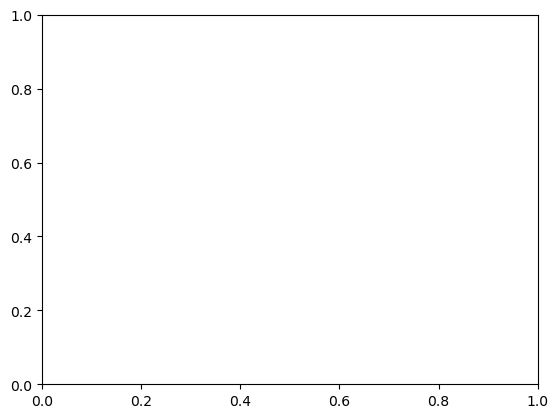

In [68]:
fig, ax = plt.subplots()
WEATHER_API_BASE = "https://api.weather.gc.ca"
fire_points_df = pd.read_csv(os.path.join('resources','fire_point_data.txt'))
def get_weather_for_day(date: datetime.datetime) -> gpd.GeoDataFrame:
  """
  Load weather data from all stations for a single day.
  """
  API = f"{WEATHER_API_BASE}/collections/climate-daily/items"

  date_start = date.__format__("%Y-%m-%d 00:00:00")
  date_end = date.__format__("%Y-%m-%d 11:59:59")

  result = requests.get(API, params={
    "datetime": f"{date_start}/{date_end}",
    "f": "json",
    "startindex": "0",
    "sortby": "LOCAL_YEAR,LOCAL_DAY",
    "limit": "5000"
  })

  data = result.json()
  features = data["features"]
  df = gpd.GeoDataFrame.from_features(features)

  return df

def get_fires_for_day(date: datetime.datetime) -> pd.DataFrame:
  """
  Get a subset of the fire points data for a single day.
  """
  df = fire_points_df[(fire_points_df["YEAR"] == date.year) & (fire_points_df["MONTH"] == date.month) & (fire_points_df["DAY"] == date.day)]
  return df

def make_weather_and_fire_animation(start_date, end_date):
  """
  Make an animation of weather and fire data over a range of dates.
  """
  # Load fire data from CSV.
  with open(os.path.join('resources','fire_point_data.txt')) as f:
    fire_points = pd.read_csv(f)

    # Iterate through days in range.
    for i, date in enumerate(pd.date_range(start_date, end_date)):
      print(f"Processing date: {date}")

      weather_for_day_df = get_weather_for_day(date)
      fires_for_date_df = get_fires_for_day(date)

      # Create a plot with all weather data color coded from blue-red (relative temperatures)
      # Overlay with the forest fires for that day, in black.
      fig, ax = plt.subplots()
      plt.title(f"{date}")
      weather_for_day_df.plot("MEAN_TEMPERATURE", cmap="coolwarm", ax=ax)
      ax.scatter(fires_for_date_df["LONGITUDE"], fires_for_date_df["LATITUDE"], color="black", s=10)
      
      # Save frame of animation to animations folder.
      plt.savefig(f"resources/animation/{i}.png")
      plt.close()


#print(len(weather_df))
#print(len(fire_point_data_gdf))
#plt.show()
#ax.legend(loc='upper right')

In [69]:
START_DATE = datetime.datetime(2020, 5, 1)
END_DATE = datetime.datetime(2020, 5, 31)
make_weather_and_fire_animation(START_DATE, END_DATE)


Processing date: 2020-05-01 00:00:00
Processing date: 2020-05-02 00:00:00
Processing date: 2020-05-03 00:00:00
Processing date: 2020-05-04 00:00:00
Processing date: 2020-05-05 00:00:00
Processing date: 2020-05-06 00:00:00
Processing date: 2020-05-07 00:00:00
Processing date: 2020-05-08 00:00:00
Processing date: 2020-05-09 00:00:00
Processing date: 2020-05-10 00:00:00
Processing date: 2020-05-11 00:00:00
Processing date: 2020-05-12 00:00:00
Processing date: 2020-05-13 00:00:00
Processing date: 2020-05-14 00:00:00
Processing date: 2020-05-15 00:00:00
Processing date: 2020-05-16 00:00:00
Processing date: 2020-05-17 00:00:00
Processing date: 2020-05-18 00:00:00
Processing date: 2020-05-19 00:00:00
Processing date: 2020-05-20 00:00:00
Processing date: 2020-05-21 00:00:00
Processing date: 2020-05-22 00:00:00
Processing date: 2020-05-23 00:00:00
Processing date: 2020-05-24 00:00:00
Processing date: 2020-05-25 00:00:00
Processing date: 2020-05-26 00:00:00
Processing date: 2020-05-27 00:00:00
P

In [58]:
#intersecting weather and fire_point_data to select ONLY weather data that is Extreme temperatures. 
myWeatherPlot_gdf = weather_df.loc[weather_df['MAX_TEMPERATURE_FLAG']=='E'].overlay(fire_point_data_gdf, how='intersection')

3640


<Figure size 640x480 with 0 Axes>

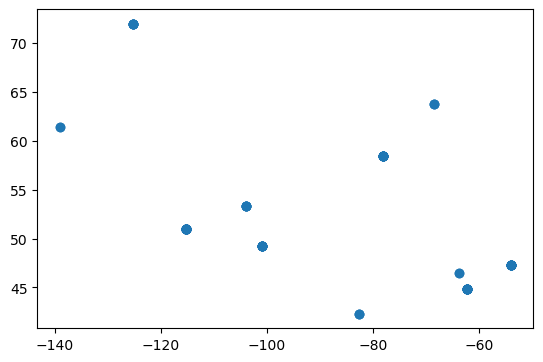

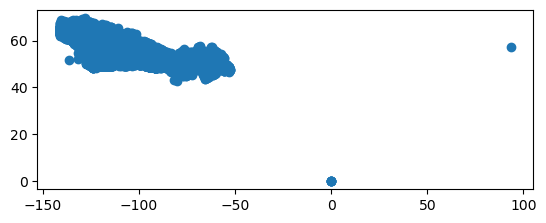

In [59]:
plt.figure()

extreme_weather_df = weather_df[weather_df["MAX_TEMPERATURE_FLAG"] == "E"]
extreme_weather_df["geometry"].plot()
print(extreme_weather_df.size)

fire_point_data_gdf["geometry"].plot()



plt.show()

In [60]:
#limiting the selected weather observations to "Extreme"
myRegion_gdf= weather_df.loc[weather_df['MAX_TEMPERATURE_FLAG']=='E']


In [61]:
#limiting the selected weather observations to "Extreme"
myMap  = myRegion_gdf.explore(column='MAX_TEMPERATURE_FLAG', cmap = 'Accent', tiles='CartoDB positron', tooltip=False)

folium.GeoJson(myWeatherPlot_gdf, name = "Fire_data", overlay = True, style_function=lambda feature:{'fillColor':'red', 'opacity':.75, 'color':'red'}).add_to(myMap)
folium.GeoJson(weather_df.loc[weather_df['MAX_TEMPERATURE_FLAG']=='E'], overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.GeoJson(weather_df.loc[weather_df['MAX_TEMPERATURE_FLAG']=='M'], overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.TileLayer("OpenStreetMap").add_to(myMap)
folium.TileLayer("CartoDB positron").add_to(myMap)
folium.LayerControl().add_to(myMap)

display(myMap)

In [62]:
#intersecting weather and fire_point_data to select ONLY weather data occuring in the month of the wildfire
myWeatherPlot_gdf = fire_point_data_gdf.loc[fire_point_data_gdf['FIRE_ID']=='2016-R90074'].overlay(weather_df, how='intersection')

In [63]:
#limiting the selected weather observations to "['FIRE_ID']=='2016-R90074'"
myRegion_gdf= fire_point_data_gdf.loc[fire_point_data_gdf['FIRE_ID']=='2016-R90074']


In [64]:
#limiting the selected weather observations to "Extreme"
myMap  = myRegion_gdf.explore(column='FIRE_ID', cmap = 'Accent', tiles='CartoDB positron', tooltip=False)

folium.GeoJson(myWeatherPlot_gdf, name = "weather-provinces-combined", overlay = True, style_function=lambda feature:{'fillColor':'red', 'opacity':.75, 'color':'red'}).add_to(myMap)
folium.GeoJson(fire_point_data_gdf.loc[fire_point_data_gdf['FIRE_ID']=='2016-R90074'], overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.GeoJson(weather_df.loc[weather_df['MAX_TEMPERATURE_FLAG']=='E'], overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.TileLayer("OpenStreetMap").add_to(myMap)
folium.TileLayer("CartoDB positron").add_to(myMap)
folium.LayerControl().add_to(myMap)

display(myMap)

In [65]:
#limiting the selected weather observations to "Extreme"
myMap  = myRegion_gdf.explore(column='MAX_TEMPERATURE_FLAG', cmap = 'Accent', tiles='CartoDB positron', tooltip=False)

folium.GeoJson(myWeatherPlot_gdf, name = "Fire_data", overlay = True, style_function=lambda feature:{'fillColor':'red', 'opacity':.75, 'color':'red'}).add_to(myMap)
folium.GeoJson(weather_df.loc[weather_df['MAX_TEMPERATURE_FLAG']=='E'], overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.TileLayer("OpenStreetMap").add_to(myMap)
folium.TileLayer("CartoDB positron").add_to(myMap)
folium.LayerControl().add_to(myMap)

display(myMap)

KeyError: 'MAX_TEMPERATURE_FLAG'

In [ ]:
# Water Monitoring Sites
with open("resources/water_sites.json", "r") as f:
    water_data = json.load(f)
    wdf = gpd.GeoDataFrame.from_features(water_data)
    

In [ ]:
# Water Sample Variable Descriptions
water_variable_info_df = pd.read_csv("resources/water_variable_info.csv")   

In [ ]:
# Water Samples by Monitoring Site ID
#water_data_df=pd.read_csv('resources/water_data.csv')

In [ ]:
C

NameError: name 'C' is not defined

In [ ]:
# Weather Polygon Data
with open("resources/weather-provinces-combined.json", "r") as f:
    weather = json.load(f)
    weather_df = gpd.GeoDataFrame.from_features(weather)

In [ ]:
# Water Drainage Watersheds Polygon Data
with open("resources/water_drainage_regions.json", "r") as f:
    water_drainage_region = json.load(f)
    wdrdf = gpd.GeoDataFrame.from_features(water_drainage_region)
wdrdf.plot(ax=ax, cmap ='Pastel1', column='ODA_Name', legend=True)

In [ ]:
# Forest Fire Point Data
fire_point_data_df =  pd.read_csv('resources/fire_point_data.txt')
fire_point_data_gdf = gpd.GeoDataFrame(fire_point_data_df, geometry=gpd.points_from_xy(fire_point_data_df.LONGITUDE, fire_point_data_df.LATITUDE), crs='EPSG:4617')

In [ ]:
def process_data():
    # Connecting to the MongoDB database
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Weather_Canada"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    weather_df = gpd.GeoDataFrame.from_features(data)
    print(weather_df.head())
process_data()

6500
                      geometry MIN_REL_HUMIDITY_FLAG  DIRECTION_MAX_GUST  \
0  POINT (-125.25417 71.99250)                  None                 0.0   
1  POINT (-125.25417 71.99250)                  None                 0.0   
2  POINT (-125.25417 71.99250)                  None                 0.0   
3  POINT (-125.25417 71.99250)                  None                 0.0   
4  POINT (-125.25417 71.99250)                  None                 0.0   

  COOLING_DEGREE_DAYS_FLAG HEATING_DEGREE_DAYS_FLAG DIRECTION_MAX_GUST_FLAG  \
0                        M                        M                    None   
1                     None                     None                    None   
2                        M                        M                    None   
3                        M                        M                    None   
4                        M                        M                    None   

  SPEED_MAX_GUST_FLAG  MAX_REL_HUMIDITY  MEAN_TEMPERATURE  \
0 

In [ ]:
# Querying the data for the 'YEAR' and 'Sqr_Kilometers' fields
    pipeline = [
        {"$match": {"YEAR": {"$gte": 1960, "$lte": 2021}}},
        {"$group": {"_id": "$YEAR", "total_sq_km": {"$sum": "$Sqr_Kilometers"}, "count": {"$sum": 1}}},
        {"$sort": {"_id": 1}}
    ]
    results = list(collection.aggregate(pipeline))

    # Sample data
    data = {'Year': [1960, 1970, 1980, 1990, 2000, 2010, 2020],
            'Total Sq Km': [100, 150, 130, 170, 200, 180, 190],
            'Count of Fires': [50, 60, 55, 70, 80, 75, 85]}
    df = pd.DataFrame(data)
    return df

def generate_plots(data):
    # Creating the bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(x=data['Year'], y=data['Total Sq Km'], name='Total Sq Km Burned', marker_color='blue', opacity=0.5))

    # Creating the line chart
    fig.add_trace(go.Scatter(x=data['Year'], y=data['Count of Fires'], name='Count of Fires', mode='lines+markers', yaxis='y2', marker=dict(color='red')))

    # Update layout
    fig.update_layout(title='Total Square Kilometers Burned per Year (1960-2021)',
                      xaxis_title='Year',
                      yaxis_title='Square Kilometers Burned',
                      yaxis2=dict(title='Count of Fires', overlaying='y', side='right', showgrid=False, showline=True, linecolor='red'),
                      barmode='group')

    # Return the HTML representation of the plot
    return fig.to_html(include_plotlyjs='cdn')

if __name__ == '__main__':
    data = process_data()
    plot_html = generate_plots(data)
    print(plot_html)

In [ ]:
def process_data():
    # Connecting to the MongoDB database
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Water_drainage_regions"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    wdr_df = gpd.GeoDataFrame.from_features(data)
    print(wdr_df.head())
process_data()

25
                                            geometry DR_Code Code_RD  \
0  POLYGON ((-119.27487 50.62710, -118.79584 50.0...      03      03   
1  MULTIPOLYGON (((-122.89017 49.08787, -122.8931...      02      02   
2  POLYGON ((-140.75267 68.64061, -136.16989 67.5...      05      05   
3  MULTIPOLYGON (((-110.82246 58.63387, -110.8359...      06      06   
4  POLYGON ((-119.68536 52.78335, -118.92132 52.8...      04      04   

                 DR_Name                Nom_RD ODA_Code Code_ADO  \
0   OkanaganSimilkameen  OkanaganSimilkameen        1        1   
1  FraserLower Mainland  FraserBasses-terres        1        1   
2                  Yukon                 Yukon        1        1   
3        PeaceAthabasca        PaixAthabasca        2        2   
4               Columbia              Columbia        1        1   

        ODA_Name          Nom_ADO  
0  Pacific Ocean  Océan Pacifique  
1  Pacific Ocean  Océan Pacifique  
2  Pacific Ocean  Océan Pacifique  
3   Arctic 

In [ ]:
def process_data():
    # Connecting to the MongoDB database
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Fire_data"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    df = gpd.GeoDataFrame.from_features(data)
    print(df.head())
process_data()

6065
                                            geometry SRC_AGENCY      FIRE_ID  \
0  POLYGON Z ((-114.94281 50.10509 0.00000, -114....         BC  2016-N10009   
1  POLYGON Z ((-115.75479 49.79610 0.00000, -115....         BC  2016-N10037   
2  POLYGON Z ((-121.61167 50.23550 0.00000, -121....         BC  2016-K70443   
3  POLYGON Z ((-115.72874 49.63289 0.00000, -115....         BC  2016-N10004   
4  POLYGON Z ((-115.75699 49.67369 0.00000, -115....         BC  2016-N10002   

  FIRENAME  YEAR  MONTH  DAY    REP_DATE DATE_TYPE OUT_DATE  ... WATER_REM  \
0     None  2016      4   13  2016-04-13      None     None  ...      None   
1     None  2016      5   13  2016-05-13      None     None  ...      None   
2     None  2016      8   31  2016-08-31      None     None  ...      None   
3     None  2016      4    5  2016-04-05      None     None  ...      None   
4     None  2016      4    2  2016-04-02      None     None  ...      None   

   UNBURN_REM  MORE_INFO   POLY_DATE      CFS

In [ ]:
def process_data():
    # Connecting to the MongoDB database
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["Proj_3_Team_4_Data_Visualization"]
    collection = db["Water_sites"]
    cursor = collection.find()
    data = list(cursor)
    print(len(data))
    wsdf = gpd.GeoDataFrame.from_features(data)
    print(wsdf.head())
process_data()

371
                     geometry       SITE_NO  \
0  POINT (-74.11560 45.22410)      00000072   
1  POINT (-73.63470 45.41290)      00000078   
2  POINT (-73.24390 45.85580)      00000075   
3  POINT (-68.23180 47.35490)  00BR01AF0084   
4  POINT (-67.61060 46.39980)  00BR01AJ0067   

                                           SITE_NAME  \
0  BEAUHARNOIS CANAL AT RTE 132 BRIDGE IN VALLEYF...   
1  ST.LAWRENCE RIVER WATER INTAKE AT THE WATER PL...   
2  ST.LAWRENCE RIVER WATER INTAKE AT THE WATER PL...   
3         SAINT JOHN RIVER BELOW ST. BASILE, RTE 144   
4      BIG PRESQUE ISLE STREAM ABOVE BRIDGE, RTE 103   

                                         SITE_NOM_FR  \
0  CANAL DE BEAUHARNOIS AU PONT-ROUTE 132 À VALLE...   
1  FLEUVE SAINT-LAURENT À LA PRISE D'EAU DE L'USI...   
2  FLEUVE SAINT-LAURENT À LA PRISE D'EAU DE L'USI...   
3  RIVIÈRE SAINT-JEAN EN AVAL DE ST. BASILE, ROUT...   
4  RUISSEAU BIG PRESQUE ISLE EN AMONT DU PONT, RO...   

                             SITE_TYPE 

### plot data

<Axes: >

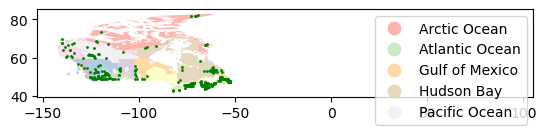

<Figure size 2400x1600 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1)
plt.figure(figsize =(24,16))
wdrdf.plot(ax=ax, cmap ='Pastel1', column='ODA_Name', legend=True)
fire_point_data_gdf[(fire_point_data_gdf["LATITUDE"] != 0) & (fire_point_data_gdf["LONGITUDE"] != 0)].plot(ax=ax, cmap ='Pastel1', markersize=1, legend=True)
wdf.plot(ax=ax, color='green', markersize=1, legend=True )
# ax.legend(loc='upper right')

### The intersection with the fire data takes ~ 5 - 10 minutes I will move it to a data prep step

In [ ]:
#intersecting weather and fire_point_data to select ONLY weather data occuring in the month of the wildfire
myWeatherPlot_gdf = fire_point_data_gdf.loc[fire_point_data_gdf['ODA_Name']=='MONTH'].overlay(weather_df, how='intersection')

KeyError: 'ODA_Name'

In [ ]:
#intersecting watershed and fire data to select ONLY fire data occuring in the Atlatic Ocean Watershed
myMainPlot_gdf = wdrdf.loc[wdrdf['ODA_Name']=='Atlantic Ocean'].overlay(fire_point_data_gdf, how='intersection')




c:\Users\ajmohile\anaconda3\envs\dev\Lib\site-packages\geopandas\geodataframe.py:2467: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4617

  return geopandas.overlay(
c:\Users\ajmohile\anaconda3\envs\dev\Lib\site-packages\geopandas\geodataframe.py:2467: UserWarning: `keep_geom_type=True` in overlay resulted in 1273 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
wdrdf.head()

,geometry,DR_Code,Code_RD,DR_Name,Nom_RD,ODA_Code,Code_ADO,ODA_Name,Nom_ADO
0,"MULTIPOLYGON (((-123.54272 48.31717, -123.5377...",01,01,Pacific Coastal,Côte du Pacifique,1,1,Pacific Ocean,Océan Pacifique
1,"MULTIPOLYGON (((-122.89017 49.08787, -122.8931...",02,02,FraserLower Mainland,FraserBasses-terres,1,1,Pacific Ocean,Océan Pacifique
2,"POLYGON ((-119.27487 50.62710, -118.79584 50.0...",03,03,OkanaganSimilkameen,OkanaganSimilkameen,1,1,Pacific Ocean,Océan Pacifique
3,"POLYGON ((-119.68536 52.78335, -118.92132 52.8...",04,04,Columbia,Columbia,1,1,Pacific Ocean,Océan Pacifique
4,"POLYGON ((-140.75267 68.64061, -136.16989 67.5...",05,05,Yukon,Yukon,1,1,Pacific Ocean,Océan Pacifique


In [ ]:
fire_point_data_gdf.head()

,FID,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry
0,0,BC,1950-G00026,,59.876,-131.922,1950,6,4,1950-06-04 00:00:00,...,BC-1950-1950-G00026,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT (-131.92200 59.87600)
1,1,BC,1951-R00097,,59.760,-132.808,1951,7,15,1951-07-15 00:00:00,...,BC-1951-1951-R00097,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT (-132.80800 59.76000)
2,2,BC,1950-G00035,,57.463,-122.816,1950,6,14,1950-06-14 00:00:00,...,BC-1950-1950-G00035,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines,POINT (-122.81600 57.46300)
3,3,BC,1953-G00043,,57.684,-121.925,1953,5,1,1953-05-01 00:00:00,...,BC-1953-1953-G00043,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines,POINT (-121.92500 57.68400)
4,4,BC,1950-R00029,,59.318,-133.228,1950,6,22,1950-06-22 00:00:00,...,BC-1950-1950-R00029,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT (-133.22800 59.31800)


In [ ]:
myMainPlot_gdf.head()

,DR_Code,Code_RD,DR_Name,Nom_RD,ODA_Code,Code_ADO,ODA_Name,Nom_ADO,FID,SRC_AGENCY,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry


In [ ]:
#For a = wdrdf
#b = fire_point_data_gdf
#a_converted = a.to_crs(b.crs)

In [ ]:
#limiting the selected drainage region to the Atlantic Region and renaming the colum for DR_Name
myRegion_gdf= wdrdf.loc[wdrdf['ODA_Name']=='Atlantic Ocean'][['DR_Name', 'geometry']]
myRegion_gdf = myRegion_gdf.rename(columns={'DR_Name': 'Drainage Basin'})

In [ ]:
myMap  = myRegion_gdf.explore(column='Drainage Basin', cmap = 'Accent', tiles='CartoDB positron', tooltip=False)

folium.Json(myMainPlot_gdf, name = "Forest Fires", overlay = True, style_function=lambda feature:{'fillColor':'red', 'opacity':.75, 'color':'red'}).add_to(myMap)
folium.Json(wdf.loc[wdf['OCEANDA']=='ATLANTIC OCEAN'], name ="Montoring Sites", overlay = True, style_function=lambda feature:{'color':'green'}).add_to(myMap)
folium.TileLayer("OpenStreetMap").add_to(myMap)
folium.TileLayer("CartoDB positron").add_to(myMap)
folium.LayerControl().add_to(myMap)

myMap

AttributeError: module 'folium' has no attribute 'Json'